In [3]:
import math
# import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.layers import Dense, LSTM

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
plt.style.use('fivethirtyeight')

In [7]:
df = pd.read_csv('ge.us.txt', sep=",", header=0)
# data = pd.read_csv('month.txt', sep=",", header=0)
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"]

In [8]:
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,0
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,0
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,0
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244,0
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430,0
5,1962-01-09,0.5957,0.6037,0.5878,0.5957,2778285,0
6,1962-01-10,0.5957,0.6037,0.5957,0.5957,2337096,0
7,1962-01-11,0.5957,0.5957,0.5878,0.5957,1943605,0
8,1962-01-12,0.5957,0.6037,0.5878,0.5878,2015151,0
9,1962-01-15,0.5957,0.5957,0.5957,0.5957,2527879,0


In [9]:
df.shape

(14058, 7)

In [10]:
df['Date']

0        1962-01-02
1        1962-01-03
2        1962-01-04
3        1962-01-05
4        1962-01-08
5        1962-01-09
6        1962-01-10
7        1962-01-11
8        1962-01-12
9        1962-01-15
10       1962-01-16
11       1962-01-17
12       1962-01-18
13       1962-01-19
14       1962-01-22
15       1962-01-23
16       1962-01-24
17       1962-01-25
18       1962-01-26
19       1962-01-29
20       1962-01-30
21       1962-01-31
22       1962-02-01
23       1962-02-02
24       1962-02-05
25       1962-02-06
26       1962-02-07
27       1962-02-08
28       1962-02-09
29       1962-02-12
            ...    
14028    2017-10-02
14029    2017-10-03
14030    2017-10-04
14031    2017-10-05
14032    2017-10-06
14033    2017-10-09
14034    2017-10-10
14035    2017-10-11
14036    2017-10-12
14037    2017-10-13
14038    2017-10-16
14039    2017-10-17
14040    2017-10-18
14041    2017-10-19
14042    2017-10-20
14043    2017-10-23
14044    2017-10-24
14045    2017-10-25
14046    2017-10-26


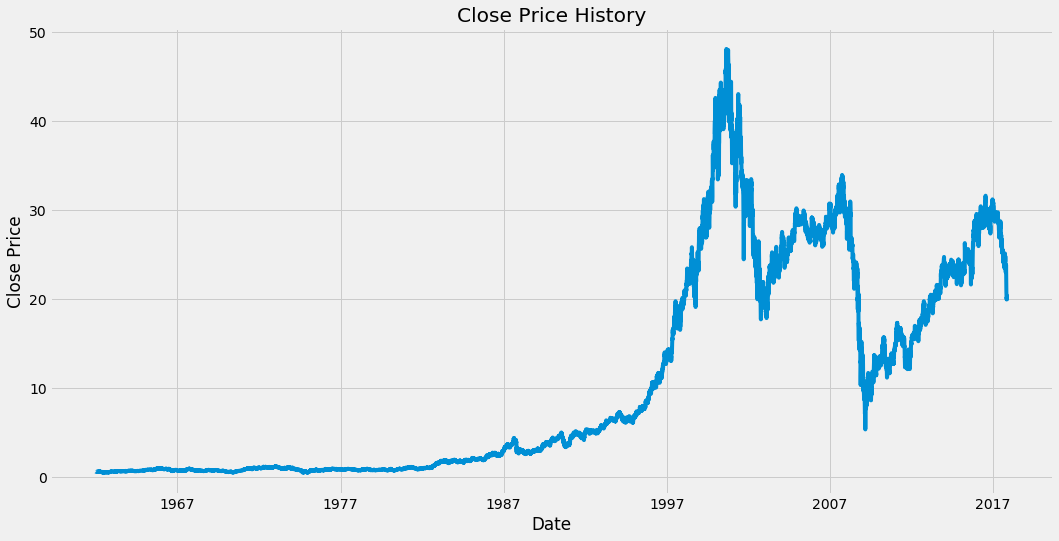

In [11]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df['Date']], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [12]:
data = df.filter(['Close'])

In [13]:
dataset = data.values

In [14]:
# training 80% of the data
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

11247

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00338425],
       [0.00338425],
       [0.00321827],
       ...,
       [0.41307201],
       [0.41034074],
       [0.42084561]])

In [16]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00338425, 0.00338425, 0.00321827, 0.00287161, 0.00287161,
       0.00287161, 0.00287161, 0.00287161, 0.00270563, 0.00287161,
       0.00303969, 0.00270563, 0.00287161, 0.00303969, 0.00303969,
       0.00270563, 0.00303969, 0.00287161, 0.00287161, 0.00287161,
       0.00303969, 0.00354392, 0.00338425, 0.00338425, 0.00321827,
       0.00338425, 0.00354392, 0.00354392, 0.00354392, 0.00354392,
       0.00372251, 0.00372251, 0.00389058, 0.00389058, 0.00372251,
       0.00372251, 0.00372251, 0.00354392, 0.00338425, 0.00354392,
       0.00338425, 0.00372251, 0.00372251, 0.00372251, 0.00354392,
       0.00372251, 0.00389058, 0.00405446, 0.00405446, 0.00405446,
       0.00389058, 0.00405446, 0.00405446, 0.00389058, 0.00389058,
       0.00389058, 0.00389058, 0.00405446, 0.00372251, 0.00389058])]
[0.00405445891735148]

[array([0.00338425, 0.00338425, 0.00321827, 0.00287161, 0.00287161,
       0.00287161, 0.00287161, 0.00287161, 0.00270563, 0.00287161,
       0.00303969, 0.00270563, 0.00

In [17]:
x_train, y_train = np.array(x_train),np.array(y_train)

In [18]:
x_train.shape

(11187, 60)

In [19]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [20]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [21]:
model.compile(optimizer='adam', loss='mse')

In [48]:
model.fit(x_train,y_train,batch_size=20, epochs=1)

Epoch 1/1
11187/11187 [==============================] - 258s - loss: 9.0133e-05   


In [49]:
model

In [50]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [51]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [52]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [53]:
len(predictions)

2811

In [54]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.2213391398885504

In [55]:
mse=np.sum((predictions-y_test)**2)/len(predictions)
print('mse:',mse)

mse: 0.29673335476669743


In [57]:
mae=np.sum(np.absolute(predictions-y_test))/len(predictions)
print('mae:',mae)

mae: 0.3973067512257079


In [67]:
df['Date'][:int(len(df)*0.8)]

0        1962-01-02
1        1962-01-03
2        1962-01-04
3        1962-01-05
4        1962-01-08
5        1962-01-09
6        1962-01-10
7        1962-01-11
8        1962-01-12
9        1962-01-15
10       1962-01-16
11       1962-01-17
12       1962-01-18
13       1962-01-19
14       1962-01-22
15       1962-01-23
16       1962-01-24
17       1962-01-25
18       1962-01-26
19       1962-01-29
20       1962-01-30
21       1962-01-31
22       1962-02-01
23       1962-02-02
24       1962-02-05
25       1962-02-06
26       1962-02-07
27       1962-02-08
28       1962-02-09
29       1962-02-12
            ...    
11216    2006-08-01
11217    2006-08-02
11218    2006-08-03
11219    2006-08-04
11220    2006-08-07
11221    2006-08-08
11222    2006-08-09
11223    2006-08-10
11224    2006-08-11
11225    2006-08-14
11226    2006-08-15
11227    2006-08-16
11228    2006-08-17
11229    2006-08-18
11230    2006-08-21
11231    2006-08-22
11232    2006-08-23
11233    2006-08-24
11234    2006-08-25


In [63]:
len(df)

14058

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


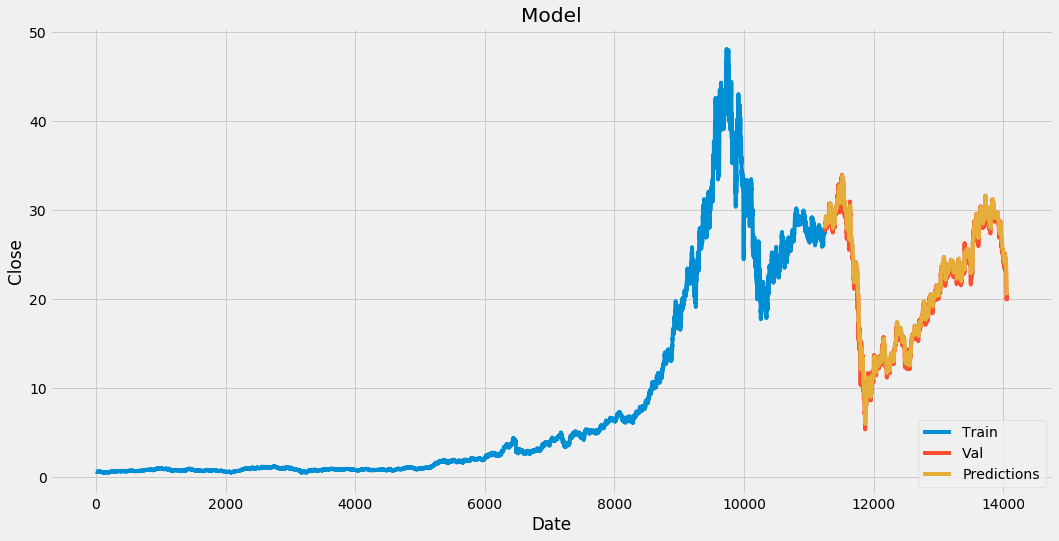

In [77]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions']=predictions
plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel('Date')
plt.ylabel('Close')

plt.plot(train['Close'])
# plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df['Date'][:len(df)*0.8]], train['Close'])

# plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df['Date'][int(len(df)*0.8)]:], valid[['Close', 'predictions']])
plt.plot(valid[['Close', 'predictions']])


plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()